# Histogram of Oriented Gradients (HoG)

This jupyter notebook has been written to partner with the article *A review of image based facial landmark identification techniques*.

This notebook is licensed under the BSD 3-Clause license.

In [1]:
import numpy as np
from scipy.misc import imread
from matplotlib import rcParams
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.feature import hog
%matplotlib inline

In [2]:
# Read in the source image 
img = imread('../Sec2_Dataset_selection/display_image.jpg')
rcParams['figure.figsize'] = (10, 10)

## Stage 1: Gamma Normalisation

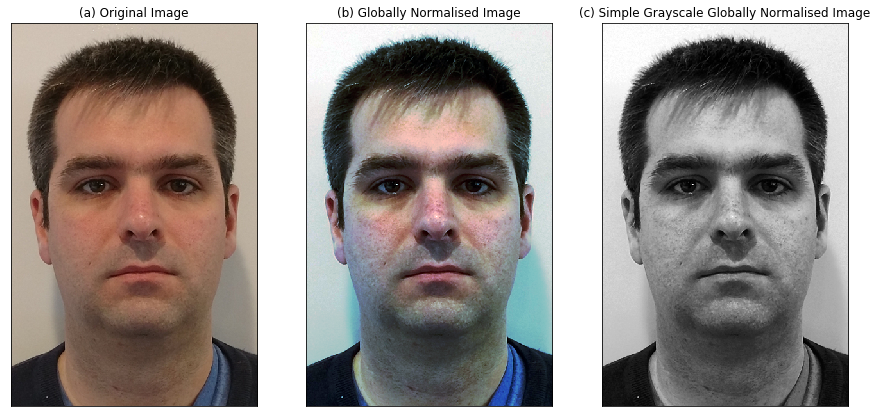

In [3]:
# Apply normalisation for each channel of the image
_, _, c = img.shape # Determine the number of channels in the image
img_norm = np.zeros(img.shape)
for i in range(c):
    img_norm[:,:,i] = exposure.equalize_hist(img[:,:,i]) # Execute global normalisation for each channel

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(15, 15))

ax1.imshow(img)
ax1.set_title('(a) Original Image')
ax2.imshow(img_norm)
ax2.set_title('(b) Globally Normalised Image')

# Convert image to simple grayscale for later user
img_norm_gray = np.mean(img_norm, axis=2)
ax3.imshow(img_norm_gray, cmap='gray')
ax3.set_title('(c) Simple Grayscale Globally Normalised Image')

# Remove the axes
for ax in [ax1, ax2, ax3]:
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)

fig.savefig('normalised_image.tiff', dpi=300, bbox_inches='tight')

## Stage 2: Calculate Derivatives

Calculate the derviatives $g(x)$, $g(y)$ of the globally normalised image.  Note that these images are for demonstration only and are not actually used in the construction of the HoG descriptors.

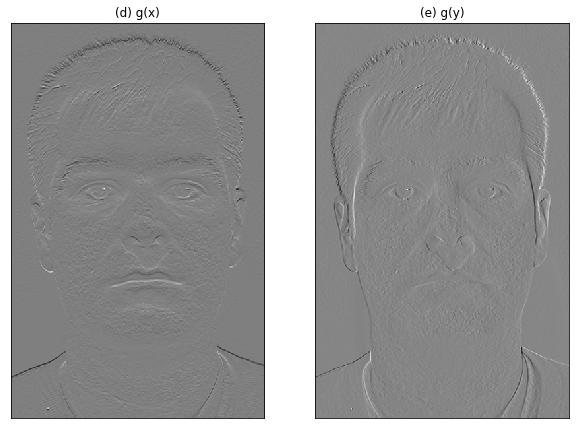

In [4]:
grads = np.gradient(img_norm_gray)
fig, ax_arr = plt.subplots(1, 2)
labels = ["(d) g(x)", "(e) g(y)"]
savenames = ["gx.tiff", "gy.tiff"]

for ax, grad, label, name in zip(ax_arr, grads, labels,savenames):
    grad += np.abs(np.min(grad))
    grad /= np.max(grad)   
    ax.imshow(grad, cmap='gray')
    ax.set_title(label)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
fig.savefig("g_x_y.tiff", dpi=300, bbox_inches='tight')

## Compute & Visualise the HoG Descriptors

The documentation for the scikit-image implementation of calculating HoG descriptors can be found here: http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog

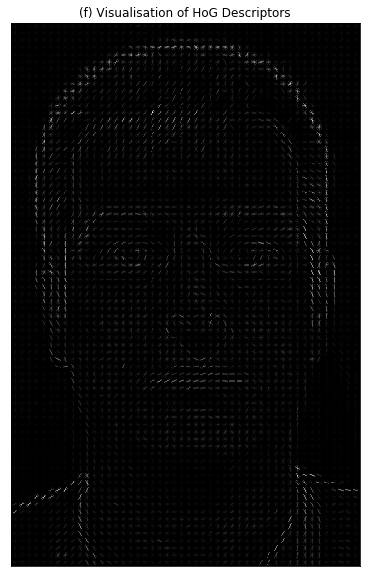

In [5]:
features, hog_img = hog(
    img_norm_gray, 
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(3, 3),
    block_norm='L2-Hys',
    visualise=True,
    transform_sqrt=False,
    feature_vector=True)

fig, ax = plt.subplots()
ax.imshow(hog_img, cmap='gray')
ax.set_title('(f) Visualisation of HoG Descriptors')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
fig.savefig('hog_visualise.tiff', dpi=300, bbox_inches='tight')